## Introduction

Importing spacy

In [2]:
import spacy

#### NLP object

At the center of spaCy is the object containing the processing pipeline. We usually call this variable "nlp".

For example, to create an English nlp object, you can import spacy and use the spacy.blank method to create a blank English pipeline. **You can use the nlp object like a function to analyze text.**

It contains all the different components in the **pipeline**.

It also includes language-specific rules used for tokenizing the text into words and punctuation. spaCy supports a variety of languages.

In [3]:
nlp = spacy.blank("en")

#### Doc object

When you process a text with the nlp object, spaCy creates a Doc object – short for "document". The Doc lets you access information about the text in a structured way, and no information is lost.

The Doc behaves like a normal Python sequence by the way and lets you iterate over its tokens, or get a token by its index. But more on that later!

In [4]:
# Created by processing a string of text with the nlp object
doc = nlp("Hello world!")

# Iterate over tokens in a Doc
for token in doc:
    print(token.text)

Hello
world
!


#### The Token object

Token objects represent the tokens in a document – for example, a word or a punctuation character.

To get a token at a specific position, you can index into the doc.

Token objects also provide various attributes that let you access more information about the tokens. For example, the `.text` attribute returns the verbatim token text.

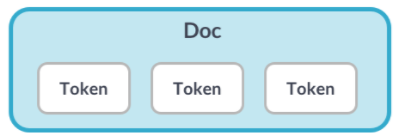

In [5]:
doc = nlp("Hello world!")

# Index into the Doc to get a single Token
token = doc[1]

# Get the token text via the .text attribute
print(token.text)

world


#### The Span object

A `Span` object is **a slice of the document consisting of one or more tokens**. It's only a view of the Doc and doesn't contain any data itself.

To create a span, you can use Python's slice notation. For example, 1:3 will create a slice starting from the token at position 1, up to – but not including! – the token at position 3.

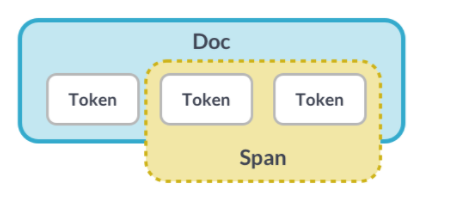

In [6]:
doc = nlp("Hello world!")

# A slice from the Doc is a Span object
span = doc[1:3]

# Get the span text via the .text attribute
print(span.text)

world!


#### Lexical attributes

Here you can see some of the available token attributes:

`i` is the index of the token within the parent document.

`text` returns the token text.

`is_alpha`, `is_punct` and `like_num` return boolean values indicating whether the token consists of **alphabetic characters**, whether it's **punctuation** or whether it **resembles a number**. For example, a token "10" – one, zero – or the word "ten" – T, E, N.

These attributes are also called lexical attributes: they refer to the entry in the vocabulary and **don't depend on the token's context.**

In [9]:
doc = nlp("It costs $5.")

print("Index:   ", [token.i for token in doc])
print("Text:    ", [token.text for token in doc])

print("is_alpha:", [token.is_alpha for token in doc])
print("is_punct:", [token.is_punct for token in doc])
print("like_num:", [token.like_num for token in doc])

Index:    [0, 1, 2, 3, 4]
Text:     ['It', 'costs', '$', '5', '.']
is_alpha: [True, True, False, False, False]
is_punct: [False, False, False, False, True]
like_num: [False, False, False, True, False]


**Geting started**

In [10]:
import spacy

# Create the English nlp object
nlp = spacy.blank('en')

# Process a text
doc = nlp("This is a sentence.")

# Print the document text
print(doc.text)

This is a sentence.


**Documents spans and tokens**

In [11]:
# Import spaCy and create the English nlp object
import spacy

nlp = spacy.blank('en')

# Process the text
doc = nlp("I like tree kangaroos and narwhals.")

# Select the first token
first_token = doc[0]

# Print the first token's text
print(first_token.text)

I


In [12]:
# Import spaCy and create the English nlp object
import spacy

nlp = spacy.blank('en')

# Process the text
doc = nlp("I like tree kangaroos and narwhals.")

# A slice of the Doc for "tree kangaroos"
tree_kangaroos = doc[2:4]
print(tree_kangaroos.text)

# A slice of the Doc for "tree kangaroos and narwhals" (without the ".")
tree_kangaroos_and_narwhals = doc[2:-1]
print(tree_kangaroos_and_narwhals.text)

tree kangaroos
tree kangaroos and narwhals


**Lexical attributes**

In this example, you’ll use spaCy’s Doc and Token objects, and lexical attributes to find percentages in a text. You’ll be looking for two subsequent tokens: a number and a percent sign.

- Use the like_num token attribute to check whether a token in the doc resembles a number.
- Get the token following the current token in the document. The index of the next token in the doc is token.i + 1.
- Check whether the next token’s text attribute is a percent sign ”%“.

In [13]:
import spacy

nlp = spacy.blank("en")

# Process the text
doc = nlp(
    "In 1990, more than 60% of people in East Asia were in extreme poverty. "
    "Now less than 4% are."
)

# Iterate over the tokens in the doc
for token in doc:
    # Check if the token resembles a number
    if token.like_num:
        # Get the next token in the document
        next_token = doc[token.i +  1]
        # Check if the next token's text equals "%"
        if next_token.text == "%":
            print("Percentage found:", token.text)

Percentage found: 60
Percentage found: 4


---
### Trained pipelines

**What are trained pipelines?**

- Models that enable spaCy to predict linguistic attributes in context
    - Part-of-speech tags
    - Syntactic dependencies
    - Named entities
- Trained on labeled example texts
- Can be updated with more examples to fine-tune predictions

Some of the most interesting things you can analyze are context-specific: for example, *whether a word is a verb or whether a span of text is a person name*.

Trained pipeline components have **statistical models** that enable spaCy to make predictions in context. This usually includes part-of speech tags, syntactic dependencies and named entities.

Pipelines are trained on large datasets of labeled example texts.

They can be updated with more examples to **fine-tune** their predictions – for example, to perform better on your specific data.

**Pipeline packages**

spaCy provides a number of trained pipeline packages you can download using the spacy `download` command. For example, the `"en_core_web_sm"` package is a small English pipeline that supports all core capabilities and is trained on web text.

The `spacy.load` method loads a pipeline package by name and returns an nlp object.

The package provides the **binary weights that enable spaCy to make predictions.**

It also includes the **vocabulary**, **meta information** about the pipeline and the **configuration file** used to train it. It tells spaCy which language class to use and how to configure the processing pipeline.

```
$ python -m spacy download en_core_web_sm
```

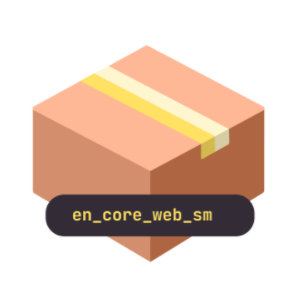

In [16]:
#!python -m spacy download en_core_web_sm

In [17]:
import spacy

nlp = spacy.load("en_core_web_sm")

**Predicting Part-of-speech Tags**

Let's take a look at the model's predictions. In this example, we're using spaCy to predict part-of-speech tags, the word types in context.

First, we load the **small English pipeline** and receive an nlp object.

Next, we're processing the text "She ate the pizza".

For each token in the doc, we can print the text and the .pos_ attribute, **the predicted part-of-speech tag**.

In spaCy, attributes that return strings usually end with an underscore – attributes without the underscore return an integer ID value.

Here, the model correctly predicted "ate" as a verb and "pizza" as a noun.

In [18]:
import spacy

# Load the small English pipeline
nlp = spacy.load("en_core_web_sm")

# Process a text
doc = nlp("She ate the pizza")

# Iterate over the tokens
for token in doc:
    # Print the text and the predicted part-of-speech tag
    print(token.text, token.pos_)

She PRON
ate VERB
the DET
pizza NOUN


**Predicting Syntactic Dependencies**

In addition to the part-of-speech tags, we can also predict how the words are related. For example, whether a word is the subject of the sentence or an object.

The  `.dep_` attribute returns the predicted dependency label.

The `.head` attribute returns the syntactic head token. You can also think of it as the parent token this word is attached to.

In [19]:
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

She PRON nsubj ate
ate VERB ROOT ate
the DET det pizza
pizza NOUN dobj ate


**Dependency label scheme**

To describe syntactic dependencies, spaCy uses a standardized label scheme. Here's an example of some common labels:

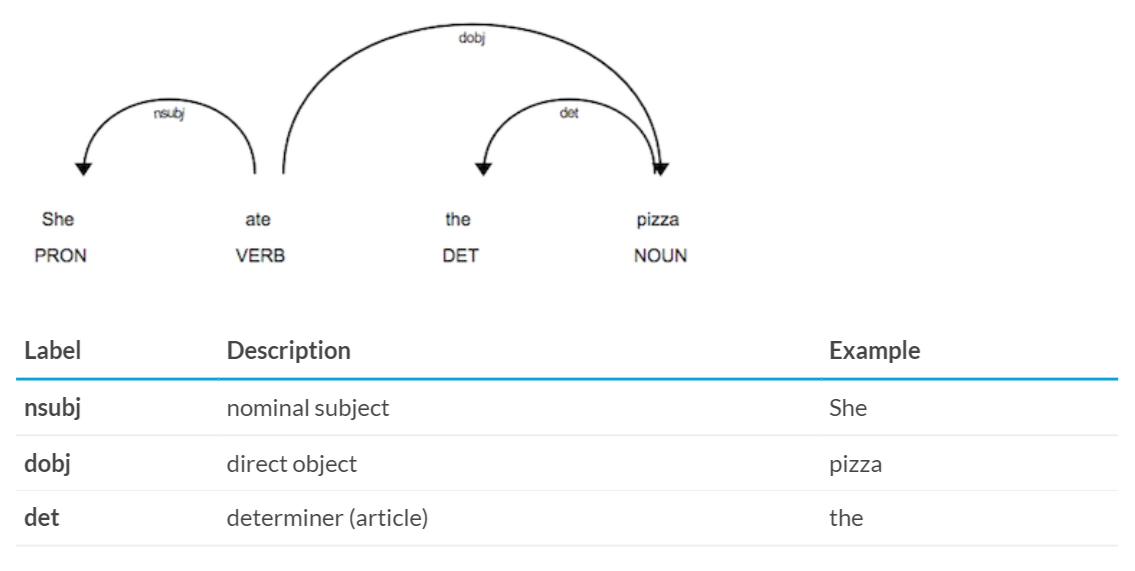

The pronoun "She" is a nominal subject attached to the verb – in this case, to "ate".

The noun "pizza" is a direct object attached to the verb "ate". It is eaten by the subject, "she".

The determiner "the", also known as an article, is attached to the noun "pizza".




**Predicting Named Entities**

Named entities are "real world objects" that are assigned a name – for example, a person, an organization or a country.

The `doc.ents` property lets you access the named entities predicted by the named entity recognition model.

It returns an **iterator of Span objects**, so we can print the entity text and the entity label using the `.label_` attribute.

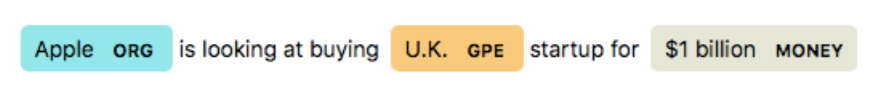

In this case, the model is correctly predicting "Apple" as an organization, "U.K." as a geopolitical entity and "$1 billion" as money.

In [20]:
# Process a text
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

# Iterate over the predicted entities
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

Apple ORG
U.K. GPE
$1 billion MONEY


**Tip: the spacy.explain method**

A quick tip: To get definitions for the most common tags and labels, you can use the `spacy.explain` helper function.

For example, "GPE" for geopolitical entity isn't exactly intuitive – but spacy.explain can tell you that it refers to countries, cities and states.

The same works for part-of-speech tags and dependency labels.

In [21]:
spacy.explain("GPE")

'Countries, cities, states'

In [22]:
spacy.explain("NNP")

'noun, proper singular'

In [23]:
spacy.explain("dobj")

'direct object'

**Loading pipelines**

In [25]:
import spacy

# Load the "en_core_web_sm" pipeline
nlp = spacy.load('en_core_web_sm')

text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

# Print the document text
print(doc.text)

It’s official: Apple is the first U.S. public company to reach a $1 trillion market value


**Predicting linguistic annotations**

In [26]:
import spacy

nlp = spacy.load("en_core_web_sm")

text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_
    # This is for formatting only
    print(f"{token_text:<12}{token_pos:<10}{token_dep:<10}")

It          PRON      nsubj     
’s          VERB      ccomp     
official    ADJ       acomp     
:           PUNCT     punct     
Apple       PROPN     nsubj     
is          AUX       ROOT      
the         DET       det       
first       ADJ       amod      
U.S.        PROPN     nmod      
public      ADJ       amod      
company     NOUN      attr      
to          PART      aux       
reach       VERB      relcl     
a           DET       det       
$           SYM       quantmod  
1           NUM       compound  
trillion    NUM       nummod    
market      NOUN      compound  
value       NOUN      dobj      


In [27]:
import spacy

nlp = spacy.load("en_core_web_sm")

text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

# Iterate over the predicted entities
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

Apple ORG
first ORDINAL
U.S. GPE
$1 trillion MONEY


**Predicgint named entities in context**

Models are statistical and not always right. Whether their predictions are correct depends on the training data and the text you’re processing.

In [28]:
import spacy

nlp = spacy.load("en_core_web_sm")

text = "Upcoming iPhone X release date leaked as Apple reveals pre-orders"

# Process the text
doc = nlp(text)

# Iterate over the entities
for entity in doc.ents:
    # Print the entity text and label
    print(entity.text, entity.label_)

# Get the span for "iPhone X"
iphone_x = doc[1:3]

# Print the span text
print("Missing entity:", iphone_x.text)

Apple ORG
Missing entity: iPhone X


## Rule-based matching

**Why not just regular expressions?**

- Match on Doc objects, not just strings
- Match on tokens and token attributes
- Use a model's predictions
- Example: "duck" (verb) vs. "duck" (noun)


Compared to regular expressions, the matcher works with Doc and Token objects instead of only strings.

It's also more flexible: you can search for texts but also other lexical attributes.

You can even write rules that use a model's predictions.

For example, find the word "duck" only if it's a verb, not a noun.

**Match pattern**

Match patterns are lists of dictionaries. Each dictionary describes one token. The keys are the names of token attributes, mapped to their expected values.

In this example, we're looking for two tokens with the text "iPhone" and "X".

We can also match on other token attributes. Here, we're looking for two tokens whose lowercase forms equal "iphone" and "x".

We can even write patterns using attributes predicted by a model. Here, we're matching a token with the lemma "buy", plus a noun. The lemma is the base form, so this pattern would match phrases like "buying milk" or "bought flowers".

In [29]:
# Match exact token texts
[{"TEXT": "iPhone"}, {"TEXT": "X"}]

# Match lexical attributes
[{"LOWER": "iphone"}, {"LOWER": "x"}]

# Match any token attributes
[{"LEMMA": "buy"}, {"POS": "NOUN"}]

[{'LEMMA': 'buy'}, {'POS': 'NOUN'}]

**Using the matcher**

In [31]:
import spacy

# Import the Matcher
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
doc = nlp("Upcoming iPhone X release date leaked as Apple reveals pre-orders")

# Initialize the Matcher with the shared vocabulary
matcher = Matcher(doc.vocab)

# Create a pattern matching two tokens: "iPhone" and "X"
pattern = [{"TEXT": "iPhone"}, {"TEXT": "X"}]

# Add the pattern to the matcher
matcher.add("IPHONE_X_PATTERN", [pattern])

# Use the matcher on the doc
matches = matcher(doc)
print("Matches:", [doc[start:end].text for match_id, start, end in matches])

Matches: ['iPhone X']


**Writing match patterns**

Write one pattern that only matches mentions of the full iOS versions: “iOS 7”, “iOS 11” and “iOS 10”.

In [32]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

doc = nlp(
    "After making the iOS update you won't notice a radical system-wide "
    "redesign: nothing like the aesthetic upheaval we got with iOS 7. Most of "
    "iOS 11's furniture remains the same as in iOS 10. But you will discover "
    "some tweaks once you delve a little deeper."
)

# Write a pattern for full iOS versions ("iOS 7", "iOS 11", "iOS 10")
pattern = [{"TEXT": 'iOS'}, {"IS_DIGIT": True}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("IOS_VERSION_PATTERN", [pattern])
matches = matcher(doc)
print("Total matches found:", len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)

Total matches found: 3
Match found: iOS 7
Match found: iOS 11
Match found: iOS 10


Write one pattern that only matches forms of “download” (tokens with the lemma “download”), followed by a token with the part-of-speech tag "PROPN" (proper noun).

In [33]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

doc = nlp(
    "i downloaded Fortnite on my laptop and can't open the game at all. Help? "
    "so when I was downloading Minecraft, I got the Windows version where it "
    "is the '.zip' folder and I used the default program to unpack it... do "
    "I also need to download Winzip?"
)

# Write a pattern that matches a form of "download" plus proper noun
pattern = [{"LEMMA": 'download'}, {"POS": 'PROPN'}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("DOWNLOAD_THINGS_PATTERN", [pattern])
matches = matcher(doc)
print("Total matches found:", len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)

Total matches found: 3
Match found: downloaded Fortnite
Match found: downloading Minecraft
Match found: download Winzip


Write one pattern that matches adjectives ("ADJ") followed by one or two "NOUN"s (one noun and one optional noun).

In [36]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

doc = nlp(
    "Features of the app include a beautiful design, smart search, automatic "
    "labels and optional voice responses."
)

# Write a pattern for adjective plus one or two nouns
pattern = [{"POS": 'ADJ'}, {"POS": 'NOUN'}, {"POS": 'NOUN', "OP": '?'}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("ADJ_NOUN_PATTERN", [pattern])
matches = matcher(doc)
print("Total matches found:", len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)

Total matches found: 5
Match found: beautiful design
Match found: smart search
Match found: automatic labels
Match found: optional voice
Match found: optional voice responses
